# **UJIAN TENGAH SEMESTER**

## **1. Pemahaman Data (data understanding)**

**Deskripsi Dataset**

Dataset ini berisi informasi tentang pasien dengan sirosis hati. Tujuan utama adalah untuk memprediksi kelangsungan hidup pasien berdasarkan berbagai fitur klinis.

**Memahami Data**

In [1]:
import pandas as pd

# Membaca dataset
df = pd.read_csv("cirrhosis.csv")

# Menampilkan 5 baris pertama
df.head()


,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


**Informasi Umum**

In [2]:
# Informasi umum tentang dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

**Statistik Deskriptif**

In [3]:
# Statistik deskriptif untuk kolom numerik
df.describe()

,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418.000000,418.000000,284.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,416.000000,412.000000
mean,209.500000,1917.782297,18533.351675,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731,3.024272
std,120.810458,1104.672992,3815.845055,4.407506,231.944545,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,1.022000,0.882042
min,1.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,105.250000,1092.750000,15644.500000,0.800000,249.500000,3.242500,41.250000,871.500000,80.600000,84.250000,188.500000,10.000000,2.000000
50%,209.500000,1730.000000,18628.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,3.000000
75%,313.750000,2613.500000,21272.500000,3.400000,400.000000,3.770000,123.000000,1980.000000,151.900000,151.000000,318.000000,11.100000,4.000000
max,418.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000


### **Frekuensi kemunculan untuk variabel kategorikal**

In [4]:

print("\nFrekuensi Variabel Kategorikal:")
for col in df.select_dtypes(include=['object']).columns:
    print(f"\n{col}:\n", df[col].value_counts())


Frekuensi Variabel Kategorikal:

Status:
 Status
C     232
D     161
CL     25
Name: count, dtype: int64

Drug:
 Drug
D-penicillamine    158
Placebo            154
Name: count, dtype: int64

Sex:
 Sex
F    374
M     44
Name: count, dtype: int64

Ascites:
 Ascites
N    288
Y     24
Name: count, dtype: int64

Hepatomegaly:
 Hepatomegaly
Y    160
N    152
Name: count, dtype: int64

Spiders:
 Spiders
N    222
Y     90
Name: count, dtype: int64

Edema:
 Edema
N    354
S     44
Y     20
Name: count, dtype: int64


**Visualisasi Distribusi Fitur**

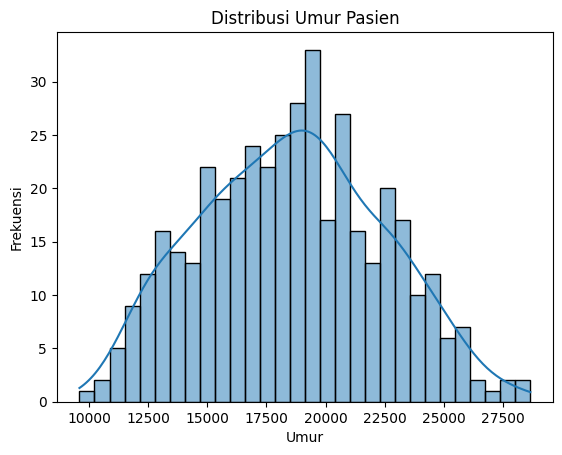

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram untuk kolom 'Age'
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Distribusi Umur Pasien')
plt.xlabel('Umur')
plt.ylabel('Frekuensi')
plt.show()

## **2. Pemrosesan awal data (Preprocessing)**


In [6]:
%pip install ace_tools


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


**Menangani Nilai Hilang**

In [7]:
# Cek tipe data
print(df.dtypes)

# Tangani kolom numerik: isi nilai hilang dengan median
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Tangani kolom kategorikal (object): isi dengan modus (nilai paling sering)
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


ID                 int64
N_Days             int64
Status            object
Drug              object
Age                int64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
dtype: object


**Encoding Variabel Kategorikal**

In [8]:
from sklearn.preprocessing import LabelEncoder

# Meng-encode kolom kategorikal
categorical_cols = ['Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Drug']
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col].astype(str))


**Normalisasi Fitur**

In [9]:
from sklearn.preprocessing import StandardScaler

# Memisahkan fitur dan target
X = df.drop('Status', axis=1)
y = df['Status']

# Normalisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


**Membagi Data**

In [10]:
from sklearn.model_selection import train_test_split

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)


**Mendeteksi oulier menggunakan LOF**

In [11]:
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor

# 1. Load dataset
df = pd.read_csv('cirrhosis.csv')

# 2. Pilih kolom sesuai header yang diberikan
cols = [
    "ID", "N_Days", "Status", "Drug", "Age", "Sex",
    "Ascites", "Hepatomegaly", "Spiders", "Edema",
    "Bilirubin", "Cholesterol", "Albumin", "Copper",
    "Alk_Phos", "SGOT", "Tryglicerides",
    "Platelets", "Prothrombin", "Stage"
]
df_subset = df[cols]

# 3. Dari subset, pilih kolom numerik untuk LOF
numeric_cols = [
    "N_Days", "Age", "Bilirubin", "Cholesterol", "Albumin",
    "Copper", "Alk_Phos", "SGOT", "Tryglicerides",
    "Platelets", "Prothrombin", "Stage"
]
X = df_subset[numeric_cols]

# 4. Imputasi nilai NaN dengan rata-rata kolom
X_imputed = X.fillna(X.mean())

# 5. Inisiasi dan fit model LOF
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
y_pred = lof.fit_predict(X_imputed)
scores = lof.negative_outlier_factor_

# 6. Tambahkan hasil ke DataFrame subset
df_subset['LOF_score'] = scores
df_subset['is_outlier'] = (y_pred == -1)

# 7. Filter hanya baris outlier dan urutkan berdasarkan skor
outliers = df_subset[df_subset['is_outlier']].sort_values('LOF_score')

# 8. Tampilkan hasil
print("Detected outliers:")
print(outliers)

Detected outliers:
      ID  N_Days Status             Drug    Age Sex Ascites Hepatomegaly  \
29    30     321      D          Placebo  15116   F       N            Y   
52    53    1000      D  D-penicillamine  24621   F       N            Y   
28    29    4509      C          Placebo  23331   F       N            N   
36    37     223      D  D-penicillamine  22546   F       Y            Y   
55    56    1847      D          Placebo  12279   F       N            Y   
23    24    4079      D  D-penicillamine  16261   M       N            Y   
205  206    2255      C  D-penicillamine  22642   F       N            N   
53    54    1434      D  D-penicillamine  14317   F       Y            Y   
42    43    4556      C  D-penicillamine  17850   F       N            N   
304  305    1216      C          Placebo  15730   F       N            Y   
57    58    4459      C  D-penicillamine  16279   M       N            N   
58    59    2224      D  D-penicillamine  14754   F       N          

 **Mendeteksi Outlier Menggunakan K-NN**

In [12]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

# 1. Load data
df = pd.read_csv('cirrhosis.csv')

# 2. Pilih fitur numerik
numeric_cols = [
    "N_Days", "Age", "Bilirubin", "Cholesterol", "Albumin",
    "Copper", "Alk_Phos", "SGOT", "Tryglicerides",
    "Platelets", "Prothrombin", "Stage"
]
X = df[numeric_cols].copy()

# 3. Imputasi nilai NaN
X.fillna(X.mean(), inplace=True)

# 4. Standarisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Hitung rata-rata jarak ke k tetangga terdekat
k = 20
nbrs = NearestNeighbors(n_neighbors=k)
nbrs.fit(X_scaled)
distances, _ = nbrs.kneighbors(X_scaled)

# 6. Skor outlier: rata-rata jarak ke tetangga terdekat
outlier_scores = distances.mean(axis=1)
df['KNN_score'] = outlier_scores

# 7. Tentukan threshold (misal 5% tertinggi dianggap outlier)
threshold = np.percentile(outlier_scores, 95)
df['is_outlier'] = df['KNN_score'] > threshold

# 8. Tampilkan outlier
outliers = df[df['is_outlier']].sort_values(by='KNN_score', ascending=False)
print(outliers[['KNN_score', 'is_outlier'] + numeric_cols])

     KNN_score  is_outlier  N_Days    Age  Bilirubin  Cholesterol  Albumin  \
74    7.634211        True    1191  15895       17.1        674.0     2.53   
190   7.326208        True     216  19246       24.5       1092.0     3.35   
165   7.009484        True    2721  15105        5.7       1480.0     3.26   
324   6.342478        True    4795  12419        1.8          NaN     3.24   
17    5.902285        True     131  19698       11.4        178.0     2.80   
55    5.783596        True    1847  12279        1.1        498.0     3.80   
129   5.767484        True    1413  16154       17.4       1775.0     3.43   
22    5.718094        True     264  20442       17.4        395.0     2.94   
106   5.716930        True    3388  22836        0.6        212.0     4.03   
280   5.391823        True      41  24064       17.9        175.0     2.10   
246   5.266407        True     732  15056        6.1       1712.0     2.83   
85    5.109141        True    1657  19270        5.0       1600.

## **3. Pemodelan (model klasifikasi)**

**Model yang Digunakan**
- Logistic Regression  
- Decision Tree  
- Random Forest  
- K-Nearest Neighbors  
- Support Vector Machine  

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Inisialisasi model
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC()
}

# Melatih dan mengevaluasi setiap model
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} model trained.")


Logistic Regression model trained.
Decision Tree model trained.


Random Forest model trained.
KNN model trained.
SVM model trained.


## **4. Evaluasi Model**

**Metrik Evaluasi**
- Akurasi  
- Precision  
- Recall  
- F1-Score  
- Confusion Matrix  

**Implementasi Evaluasi**

🔍 Evaluasi untuk Logistic Regression:
Akurasi: 0.85
Precision: 0.56
Recall: 0.59
F1-Score: 0.58


/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


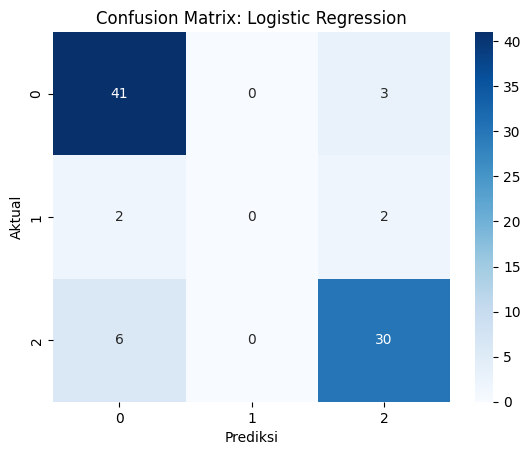

🔍 Evaluasi untuk Decision Tree:
Akurasi: 0.79
Precision: 0.64
Recall: 0.62


F1-Score: 0.63


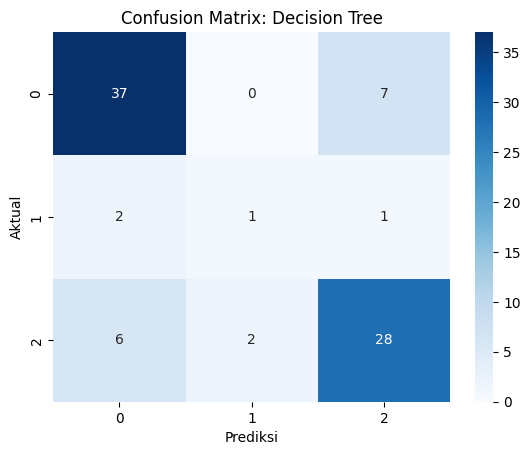

🔍 Evaluasi untuk Random Forest:
Akurasi: 0.81
Precision: 0.54
Recall: 0.56
F1-Score: 0.55


/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


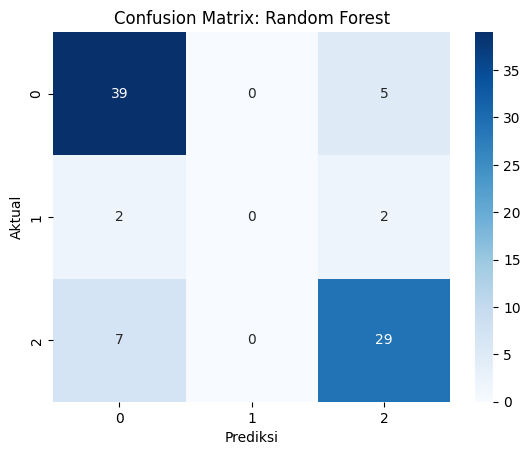

🔍 Evaluasi untuk KNN:
Akurasi: 0.77
Precision: 0.54
Recall: 0.53
F1-Score: 0.52


/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


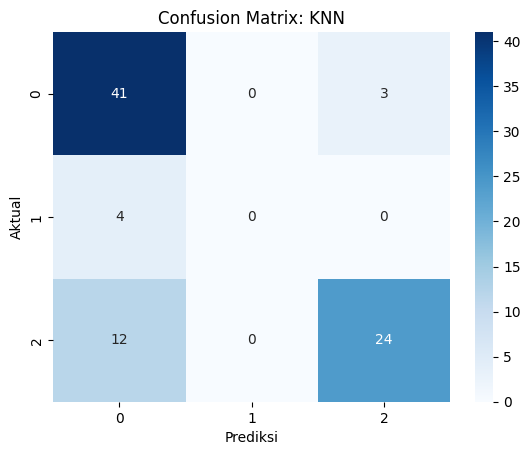

🔍 Evaluasi untuk SVM:
Akurasi: 0.80
Precision: 0.54
Recall: 0.55
F1-Score: 0.54


/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


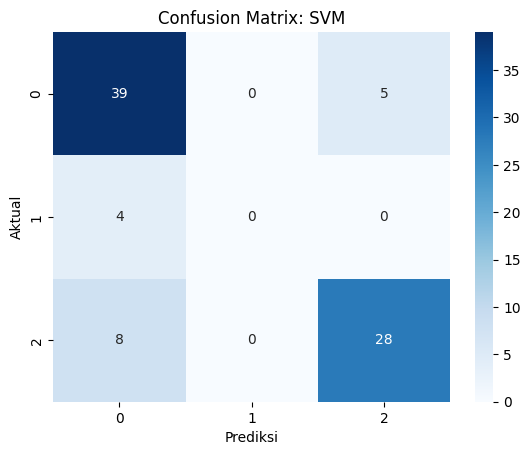

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

for name, model in models.items():
    model.fit(X_train, y_train)  # Latih model
    y_pred = model.predict(X_test)  # Prediksi

    print(f"🔍 Evaluasi untuk {name}:")
    print(f"Akurasi: {accuracy_score(y_test, y_pred):.2f}")
    print(f"Precision: {precision_score(y_test, y_pred, average='macro'):.2f}")
    print(f"Recall: {recall_score(y_test, y_pred, average='macro'):.2f}")
    print(f"F1-Score: {f1_score(y_test, y_pred, average='macro'):.2f}")

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix: {name}')
    plt.xlabel('Prediksi')
    plt.ylabel('Aktual')
    plt.show()
